In [2]:
%load_ext autoreload
%autoreload 2

import evaluation
import pandas as pd
import os
import visualization as vis
import mir_eval
from glob import glob
import numpy as np
import datasets

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

experiments_dir = "../experimenty/HCNN/"

from common_jupyter import *

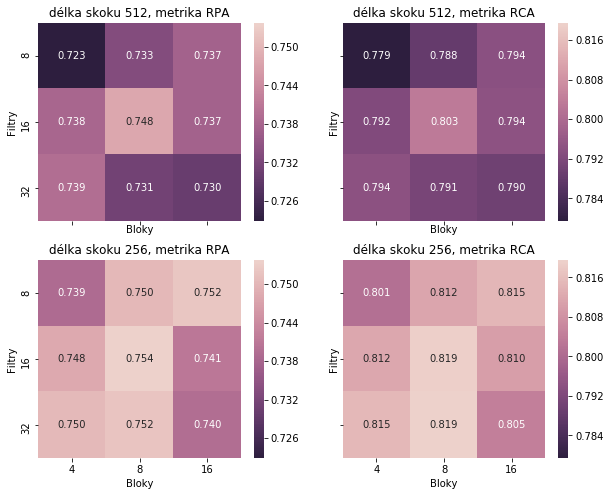

In [3]:
# HOP SIZE 256 VS 512

attr_names = ["Filtry", "Bloky"]
data1 = ld(attr_names, [int, int], ".*spctrgrm-bs16-cw0-apw1-sus8-sos8-f(8|16|32)-s(4|8|16)-us2-os3/",experiments_dir)
data2 = ld(attr_names, [int, int], ".*spctrgrm-bs16-fw256-cw0-apw1-sus8-sos8-f(\d+)-s(\d+)-us2-os3/",experiments_dir)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,8))

vminRPA, vmaxRPA, vminRCA, vmaxRCA = get_min_max([data1, data2], attr_names)

axs[0,0].set_title("délka skoku 512, metrika RPA")
axs[1,0].set_title("délka skoku 256, metrika RPA")
axs[0,1].set_title("délka skoku 512, metrika RCA")
axs[1,1].set_title("délka skoku 256, metrika RCA")

summary = plot_grid(data1, attr_names, axs=axs[0], vminRPA=vminRPA, vmaxRPA=vmaxRPA, vminRCA=vminRCA, vmaxRCA=vmaxRCA)
summary = plot_grid(data2, attr_names, axs=axs[1], vminRPA=vminRPA, vmaxRPA=vmaxRPA, vminRCA=vminRCA, vmaxRCA=vmaxRCA)

plt.savefig("figures/spectrogram_512_vs_256.pdf", bbox_inches="tight")

('0511_025429-spctrgrm-bs8-fw256-apw10-sus8-sos8-f8-s4-us1-os2', [8, 4])
('0511_030855-spctrgrm-bs8-fw256-apw10-sus8-sos8-f16-s4-us1-os2', [16, 4])
('0511_033242-spctrgrm-bs8-fw256-apw10-sus8-sos8-f32-s4-us1-os2', [32, 4])
('0511_041136-spctrgrm-bs8-fw256-apw10-sus8-sos8-f8-s8-us1-os2', [8, 8])
('0511_043526-spctrgrm-bs8-fw256-apw10-sus8-sos8-f16-s8-us1-os2', [16, 8])
('0511_051427-spctrgrm-bs8-fw256-apw10-sus8-sos8-f32-s8-us1-os2', [32, 8])
('0511_061946-spctrgrm-bs8-fw256-apw10-sus8-sos8-f8-s16-us1-os2', [8, 16])
('0511_065849-spctrgrm-bs8-fw256-apw10-sus8-sos8-f16-s16-us1-os2', [16, 16])
('0511_080546-spctrgrm-bs8-fw256-apw10-sus8-sos8-f32-s16-us1-os2', [32, 16])


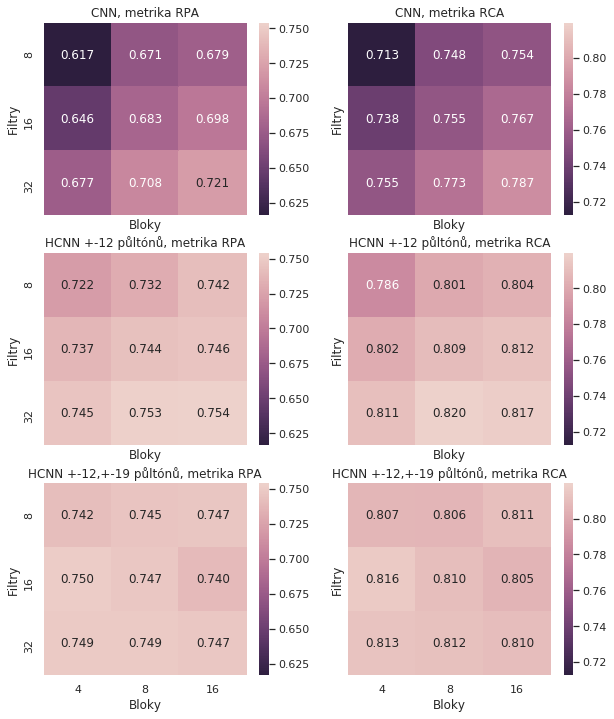

In [30]:
# HARMONIC STACKING

attr_names = ["Filtry", "Bloky"]
data1 = ld(attr_names, [int, int], "spctrgrm-bs8-fw256-apw10-sus8-sos8-f(\d+)-s(\d+)/",experiments_dir)
data2 = ld(attr_names, [int, int], "spctrgrm-bs8-fw256-apw10-sus8-sos8-f(\d+)-s(4|8|16|)-us1-os2/",experiments_dir, verbose=True)
data3 = ld(attr_names, [int, int], "spctrgrm-bs8-fw256-apw10-sus8-sos8-f(\d+)-s(\d+)-us2-os3/",experiments_dir)

vminRPA, vmaxRPA, vminRCA, vmaxRCA = get_min_max([data1, data2, data3], attr_names)

fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10,12))

axs[0,0].set_title("CNN, metrika RPA")
axs[0,1].set_title("CNN, metrika RCA")
axs[1,0].set_title("HCNN +-12 půltónů, metrika RPA")
axs[1,1].set_title("HCNN +-12 půltónů, metrika RCA")
axs[2,0].set_title("HCNN +-12,+-19 půltónů, metrika RPA")
axs[2,1].set_title("HCNN +-12,+-19 půltónů, metrika RCA")

summary = plot_grid(data1, attr_names, axs=axs[0], vminRPA=vminRPA, vmaxRPA=vmaxRPA, vminRCA=vminRCA, vmaxRCA=vmaxRCA)
summary = plot_grid(data3, attr_names, axs=axs[2], vminRPA=vminRPA, vmaxRPA=vmaxRPA, vminRCA=vminRCA, vmaxRCA=vmaxRCA)
summary = plot_grid(data2, attr_names, axs=axs[1], vminRPA=vminRPA, vmaxRPA=vmaxRPA, vminRCA=vminRCA, vmaxRCA=vmaxRCA)

fig.savefig("figures/spectrogram_harmonic_stacking.pdf", bbox_inches="tight")

('0511_025429-spctrgrm-bs8-fw256-apw10-sus8-sos8-f8-s4-us1-os2', [8, 4])
('0511_030855-spctrgrm-bs8-fw256-apw10-sus8-sos8-f16-s4-us1-os2', [16, 4])
('0511_033242-spctrgrm-bs8-fw256-apw10-sus8-sos8-f32-s4-us1-os2', [32, 4])
('0511_041136-spctrgrm-bs8-fw256-apw10-sus8-sos8-f8-s8-us1-os2', [8, 8])
('0511_043526-spctrgrm-bs8-fw256-apw10-sus8-sos8-f16-s8-us1-os2', [16, 8])
('0511_051427-spctrgrm-bs8-fw256-apw10-sus8-sos8-f32-s8-us1-os2', [32, 8])
('0511_061946-spctrgrm-bs8-fw256-apw10-sus8-sos8-f8-s16-us1-os2', [8, 16])
('0511_065849-spctrgrm-bs8-fw256-apw10-sus8-sos8-f16-s16-us1-os2', [16, 16])
('0511_080546-spctrgrm-bs8-fw256-apw10-sus8-sos8-f32-s16-us1-os2', [32, 16])
('0510_161823-spctrgrm-bs8-fw256-apw10-scqt_fs-sus8-sos8-f16-s4-us1-os2', [16, 4])
('0510_171458-spctrgrm-bs8-fw256-apw10-scqt_fs-sus8-sos8-f32-s4-us1-os2', [32, 4])
('0510_175717-spctrgrm-bs8-fw256-apw10-scqt_fs-sus8-sos8-f8-s8-us1-os2', [8, 8])
('0510_211408-spctrgrm-bs8-fw256-apw10-scqt_fs-sus8-sos8-f16-s8-us1-os2', [16,

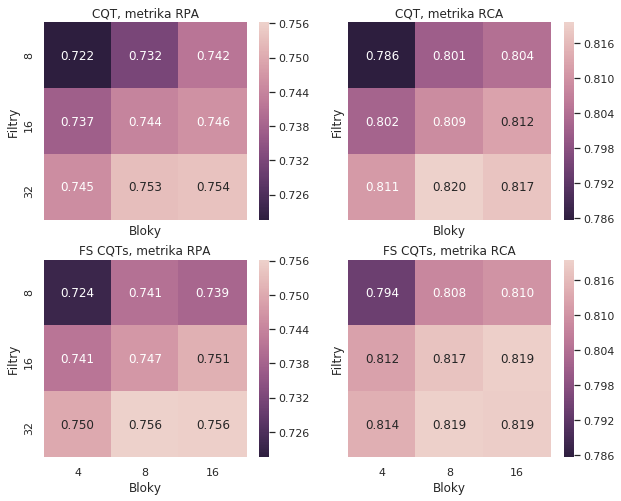

In [29]:
attr_names = ["Filtry", "Bloky"]
data1 = ld(attr_names, [int, int], "spctrgrm-bs8-fw256-apw10-sus8-sos8-f(\d+)-s(4|8|16|)-us1-os2/",experiments_dir, verbose=True)
data2 = ld(attr_names, [int, int], "spctrgrm-bs8-fw256-apw10-scqt_fs-sus8-sos8-f(\d+)-s(4|8|16|)-us1-os2/",experiments_dir, verbose=True)

vminRPA, vmaxRPA, vminRCA, vmaxRCA = get_min_max([data1, data2], attr_names)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,8))

axs[0,0].set_title("CQT, metrika RPA")
axs[0,1].set_title("CQT, metrika RCA")
axs[1,0].set_title("FS CQTs, metrika RPA")
axs[1,1].set_title("FS CQTs, metrika RCA")

summary = plot_grid(data1, attr_names, axs=axs[0], vminRPA=vminRPA, vmaxRPA=vmaxRPA, vminRCA=vminRCA, vmaxRCA=vmaxRCA)
summary = plot_grid(data2, attr_names, axs=axs[1], vminRPA=vminRPA, vmaxRPA=vmaxRPA, vminRCA=vminRCA, vmaxRCA=vmaxRCA)
fig.savefig("figures/spectrogram_fscqt.pdf", bbox_inches="tight")

In [31]:
# CONTEXT cc3
#attr_names = ["Filtry", "Bloky"]
#data = ld(attr_names, [int, int], "spctrgrm-bs8-fw256-cw16384-apw10-sus8-sos8-f(\d+)-s(\d+)-us1-os2-cc3/",experiments_dir, verbose=True)
#summary = plot_grid(data, attr_names, "spectrogram_gridsearch_ctx1_hcnn1")

# CONTEXT SUMMARY ALL EXPERIMENTS
attr_names = ["Konfigurace bloků", "Úprava architektury"]
data_noctx = ld(attr_names, [str, str], "spctrgrm-bs8-fw256-(?:|cw\d*-)apw10-sus8-sos8(?:|-cc0)-(f(?:8|16)-s(?:4|8))-us(1)-os2/", experiments_dir, verbose=False)
data_ctx = ld(attr_names, [str, str], "spctrgrm-bs8-fw256-(?:|cw\d*-)apw10-sus8-sos8(?:|-cc0)-(f(?:8|16)-s(?:4|8))-us1-os2-cc(.*)/", experiments_dir, verbose=False)
all_data = pd.concat([data_noctx, data_ctx])
all_data["archconf"] = all_data["Konfigurace bloků"]
all_data.replace({
    "Úprava architektury":{
        "1":"noctx",
        "3":"deep_ctx_3",
        "9,7,5,1":"first_layers_ctx",
        "-9,-7,-5,-1":"last_layers_ctx",
        "-3,-1-d-2,-1":"1_last_layer_dilated",
        "-3,-3,-1-d-2,-2,-1":"2_last_layers_dilated",
        "-3,-3,-3,-1-d-2,-2,-2,-1":"3_last_layers_dilated",
        "-3,-3,-1-d-4,-2,-1":"2_last_layers_wavenet",
        "-3,-3,-3,-1-d-8,-4,-2,-1":"3_last_layers_wavenet"
    },
    "Konfigurace bloků":{
        "f8-s4": "8 filtrů\n4 konv. bloky",
        "f16-s4": "16 filtrů\n4 konv. bloky",
        "f8-s8": "8 filtrů\n8 konv. bloků",
        "f16-s8": "16 filtrů\n8 konv. bloků",
    }
}, inplace=True)



# data = all_data
# split="MedleyDB valid."
# plot_metric="Raw Pitch Accuracy"
# palette="cubehelix"
# drop_metrics=["Voicing Accuracy",'Voicing Recall', 'Voicing False Alarm', "Overall Accuracy"]
# figsize=(8, None)
# order=None

# if split is not None:
#     data = data[data.Dataset==split]

# hue = None
# # palette = sns.cubehelix_palette(8)
# num_bars = len(data.groupby(attr_names))
# categories = data[attr_names[0]].unique()

# if len(attr_names) > 1:
#     hue = attr_names[1]
#     categories = data[attr_names[1]].unique()
# #     palette = sns.cubehelix_palette(8)

# if palette == "cubehelix":
#     palette = sns.cubehelix_palette(len(categories)+2)
# if figsize[1] is None:
#     figsize = (figsize[0], num_bars*0.5)

# sns.set(rc={'figure.figsize': figsize})
# sns.set(style="whitegrid")

# _order = None
# if order:
#     _order = data.groupby(attr_names).mean().reset_index().sort_values(plot_metric)[attr_names[0]]
# ax = sns.boxplot(x=plot_metric, y=attr_names[0], orient="h", hue=hue, data=data, fliersize=2, palette=palette, showmeans=True, showfliers=False,
#                  meanprops={"markerfacecolor": "black", "markeredgecolor": "black"}, order=_order)
# # sns.swarmplot(x=plot_metric, y=attr_names[0], orient="h", hue=hue, data=data, dodge=True, linewidth=1, edgecolor='gray', palette=palette, alpha=0.7, size=4)

# figure = ax.get_figure()
# # print("tralala", "figures/"+name+".pdf")
# figure.savefig("figures/"+name+".pdf", bbox_inches="tight")

# summary = data.drop(drop_metrics, axis=1).groupby(attr_names).mean()
# if order:
#     summary = summary.sort_values(plot_metric)
# return summary
# to_latex(summary)

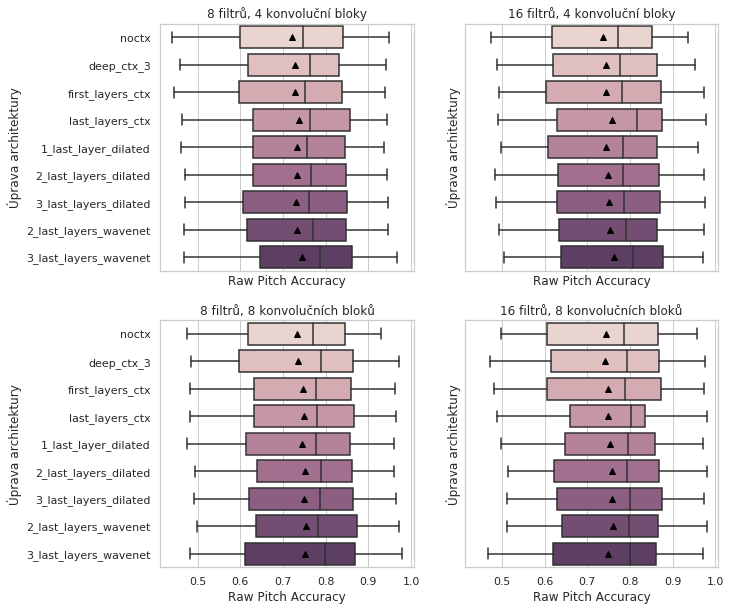

In [32]:

fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10, 10))
plt.sca(axs[0,0])
plt.title("8 filtrů, 4 konvoluční bloky")
summary = plot_data(all_data[all_data.archconf == "f8-s4"], ["Úprava architektury"], "spectrogram_ctx_archs")
plt.sca(axs[1,0])
plt.title("8 filtrů, 8 konvolučních bloků")
summary = plot_data(all_data[all_data.archconf == "f8-s8"], ["Úprava architektury"], "spectrogram_ctx_archs")
plt.sca(axs[0,1])
plt.title("16 filtrů, 4 konvoluční bloky")
summary = plot_data(all_data[all_data.archconf == "f16-s4"], ["Úprava architektury"], "spectrogram_ctx_archs")
plt.sca(axs[1,1])
plt.title("16 filtrů, 8 konvolučních bloků")
summary = plot_data(all_data[all_data.archconf == "f16-s8"], ["Úprava architektury"], "spectrogram_ctx_archs")

('0513_045129-spctrgrm-bs8-fw256-cw3072-apw10-ulw1.0-scqt_fs-sus8-sos8-cc0-f16-s4-us1-os2-cc-3,-3,-3,-1-d-8,-4,-2,-1-sp0.0', ['0.0'])
('0513_090643-spctrgrm-bs8-fw256-cw3072-apw10-ulw1.0-scqt_fs-sus8-sos8-cc0-f16-s4-us1-os2-cc-3,-3,-3,-1-d-8,-4,-2,-1-sp0.25', ['0.25'])
('0513_102535-spctrgrm-bs8-fw256-cw3072-apw10-ulw1.0-scqt_fs-sus8-sos8-cc0-f16-s4-us1-os2-cc-3,-3,-3,-1-d-8,-4,-2,-1-sp0.5', ['0.5'])
('0513_114331-spctrgrm-bs8-fw256-cw3072-apw10-ulw1.0-scqt_fs-sus8-sos8-cc0-f16-s4-us1-os2-cc-3,-3,-3,-1-d-8,-4,-2,-1-sp0.75', ['0.75'])
('0513_130143-spctrgrm-bs8-fw256-cw3072-apw10-ulw1.0-scqt_fs-sus8-sos8-cc0-f16-s4-us1-os2-cc-3,-3,-3,-1-d-8,-4,-2,-1-sp1.0', ['1.0'])
\begin{tabular}{lrr}
\toprule
Podíl augmentovaných dat &   RPA &   RCA \\
\midrule
                     0.0 & 0.754 & 0.818 \\
                    0.25 & 0.750 & 0.824 \\
                     0.5 & 0.745 & 0.820 \\
                    0.75 & 0.755 & 0.828 \\
                     1.0 & 0.759 & 0.824 \\
\bottomrule
\end{tabula

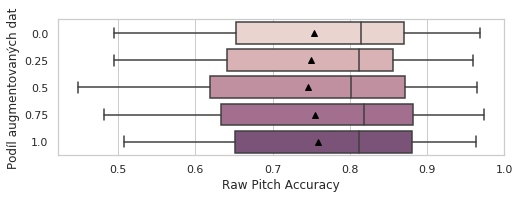

In [34]:
# FS_CQT + wavenet context + specaugment
# 0513_045129-spctrgrm-bs8-fw256-cw3072-apw10-ulw1.0-scqt_fs-sus8-sos8-cc0-f16-s4-us1-os2-cc-3,-3,-3,-1-d-8,-4,-2,-1
# 0513_090643-spctrgrm-bs8-fw256-cw3072-apw10-ulw1.0-scqt_fs-sus8-sos8-cc0-f16-s4-us1-os2-cc-3,-3,-3,-1-d-8,-4,-2,-1-sp0.25
# 0513_102535-spctrgrm-bs8-fw256-cw3072-apw10-ulw1.0-scqt_fs-sus8-sos8-cc0-f16-s4-us1-os2-cc-3,-3,-3,-1-d-8,-4,-2,-1-sp0.5
attr_names = ["Podíl augmentovaných dat"]
data = ld(attr_names, [str, str], "spctrgrm-bs8-fw256-cw3072-apw10-ulw1.0-scqt_fs-sus8-sos8-cc0-f16-s4-us1-os2-cc-3,-3,-3,-1-d-8,-4,-2,-1-sp(.*)/", experiments_dir, verbose=True)
summary = plot_data(data, attr_names, "spectrogram_specaugment")
to_latex(summary)

# New experiments MIREX

('0925_121935-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us3-os5', [8, 8])
('0925_133454-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f2-s8-us3-os5', [2, 8])
('0925_135052-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f4-s8-us3-os5', [4, 8])
('0925_140644-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f12-s8-us3-os5', [12, 8])
('0925_142349-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f16-s8-us3-os5', [16, 8])
('0925_144330-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f20-s8-us3-os5', [20, 8])
('0925_150700-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f24-s8-us3-os5', [24, 8])
('0925_153402-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f7-s8-us3-os5', [7, 8])
('0926_164036-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s4-us3-os5', [8, 4])
('0926_165613-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f12-s4-us3-os5', [12, 4])
('0926_170803-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f16-s4-us3-os5', [16, 4])
('0926_172033-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f20-

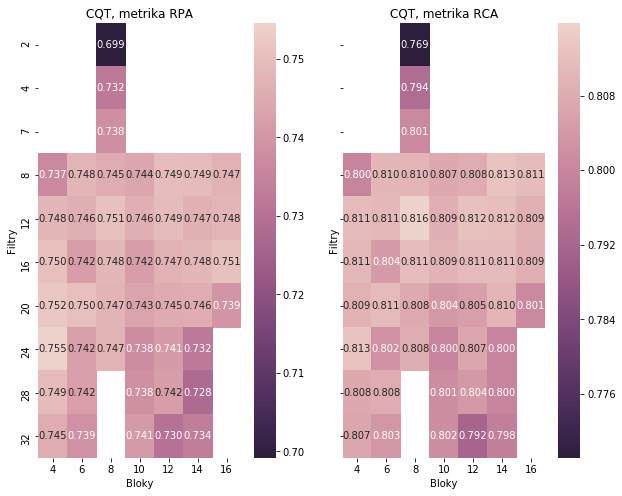

In [6]:
experiments_dir = "models"
attr_names = ["Filtry", "Bloky"]
data1 = ld(attr_names, [int, int], "spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f(\d+)-s(\d+)-us3-os5/",experiments_dir, verbose=True)
# data2 = ld(attr_names, [int, int], "spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f(\d+)-s(\d+)-us3-os5/",experiments_dir, verbose=True)

vminRPA, vmaxRPA, vminRCA, vmaxRCA = get_min_max([data1], attr_names)

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,8))

axs[0].set_title("CQT, metrika RPA")
axs[1].set_title("CQT, metrika RCA")

summary = plot_grid(data1, attr_names, axs=axs, vminRPA=vminRPA, vmaxRPA=vmaxRPA, vminRCA=vminRCA, vmaxRCA=vmaxRCA)
# summary = plot_grid(data2, attr_names, axs=axs[1], vminRPA=vminRPA, vmaxRPA=vmaxRPA, vminRCA=vminRCA, vmaxRCA=vmaxRCA)
# fig.savefig("figures/spectrogram_fscqt.pdf", bbox_inches="tight")

('0926_073833-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.05-sus8-sos8-f12-s8-us3-os5', ['0.05'])
('0926_075754-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.1-sus8-sos8-f12-s8-us3-os5', ['0.1'])
('0926_081802-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.2-sus8-sos8-f12-s8-us3-os5', ['0.2'])
('0926_083804-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.3-sus8-sos8-f12-s8-us3-os5', ['0.3'])
('0926_085822-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.4-sus8-sos8-f12-s8-us3-os5', ['0.4'])
('0926_091829-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.5-sus8-sos8-f12-s8-us3-os5', ['0.5'])
('0926_093841-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.6-sus8-sos8-f12-s8-us3-os5', ['0.6'])
('0926_100051-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.7-sus8-sos8-f12-s8-us3-os5', ['0.7'])
('0926_102257-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.8-sus8-sos8-f12-s8-us3-os5', ['0.8'])
('0926_104522-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs0.9-sus8-sos8-f12-s8-us3-os5', ['0.9'])
('0926_110753-spct

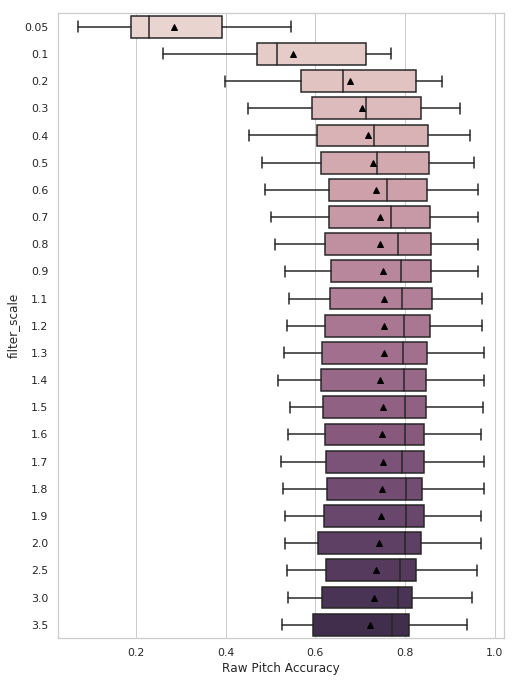

In [7]:
attr_names = ["filter_scale"]
# 0926_113007-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs1.2-sus8-sos8-f12-s8-us3-os5
data = ld(attr_names, [str, str], "spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-sfs(.*)-sus8-sos8-f12-s8-us3-os5/", experiments_dir, verbose=True)
summary = plot_data(data, attr_names, "spectrogram_filter_scale")
to_latex(summary)

('0926_001220-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std40.0-sus8-sos8-f12-s8-us3-os5', ['40.0'])
('0926_003505-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std50.0-sus8-sos8-f12-s8-us3-os5', ['50.0'])
('0926_005701-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std60.0-sus8-sos8-f12-s8-us3-os5', ['60.0'])
('0926_011909-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std70.0-sus8-sos8-f12-s8-us3-os5', ['70.0'])
('0926_014101-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std80.0-sus8-sos8-f12-s8-us3-os5', ['80.0'])
('0926_020245-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std90.0-sus8-sos8-f12-s8-us3-os5', ['90.0'])
('0926_022437-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std100.0-sus8-sos8-f12-s8-us3-os5', ['100.0'])
('0926_024712-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std110.0-sus8-sos8-f12-s8-us3-os5', ['110.0'])
('0926_030904-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std120.0-sus8-sos8-f12-s8-us3-os5', ['120.0'])
('0926_033122-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std130.0-sus8-sos8-f12-s8-us3-os5', ['1

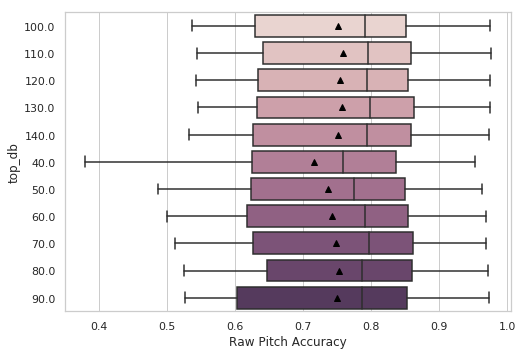

In [8]:
attr_names = ["top_db"]
data = ld(attr_names, [str, str], "spctrgrm-fw256-apw1-lr0.0005-ulw1.0-scqt-std(.*)-sus8-sos8-f12-s8-us3-os5/", experiments_dir, verbose=True)
summary = plot_data(data, attr_names, "spectrogram_top_db")
to_latex(summary)

('0925_110743-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us0-os5', [0])
('0925_114909-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us1-os5', [1])
('0925_120356-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us2-os5', [2])
('0925_121935-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us3-os5', [3])
('0925_123546-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us4-os5', [4])
('0925_125344-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us5-os5', [5])
\begin{tabular}{rrr}
\toprule
undertone &   RPA &   RCA \\
\midrule
        0 & 0.721 & 0.787 \\
        1 & 0.734 & 0.797 \\
        2 & 0.739 & 0.801 \\
        3 & 0.745 & 0.810 \\
        4 & 0.743 & 0.806 \\
        5 & 0.746 & 0.809 \\
\bottomrule
\end{tabular}



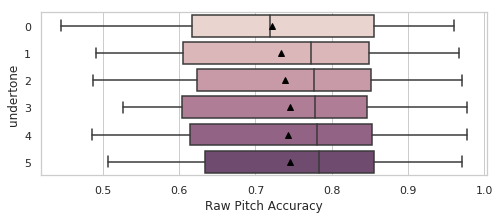

In [7]:
attr_names = ["undertone"]
data = ld(attr_names, [int], "spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us(\d)-os5", experiments_dir, verbose=True)
summary = plot_data(data, attr_names, "spectrogram_filter_scale")
to_latex(summary)

('0925_100137-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us0-os1', [1])
('0925_102824-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us0-os2', [2])
('0925_104106-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us0-os3', [3])
('0925_105414-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us0-os4', [4])
('0925_110743-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us0-os5', [5])
('0925_112138-spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us0-os6', [6])
\begin{tabular}{rrr}
\toprule
undertone &   RPA &   RCA \\
\midrule
        1 & 0.644 & 0.729 \\
        2 & 0.675 & 0.759 \\
        3 & 0.705 & 0.771 \\
        4 & 0.706 & 0.778 \\
        5 & 0.721 & 0.787 \\
        6 & 0.723 & 0.788 \\
\bottomrule
\end{tabular}



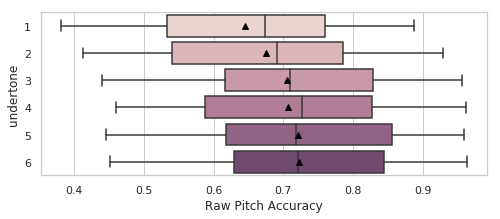

In [8]:
attr_names = ["undertone"]
data = ld(attr_names, [int], "spctrgrm-fw256-apw1-lr0.0005-ulw1.0-sus8-sos8-f8-s8-us0-os(\d)", experiments_dir, verbose=True)
summary = plot_data(data, attr_names, "spectrogram_filter_scale")
to_latex(summary)